In [1]:
PACKAGE_FOLDER = '/home/adelsondias/Repos/geohunter'

import sys
sys.path.append(PACKAGE_FOLDER)
import geohunter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

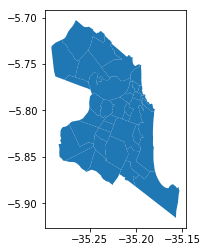

In [2]:
import geopandas as gpd

city_shape = gpd.read_file('bairros_natal.geojson')
city_shape.plot()

In [3]:
landmarks = geohunter.features.Landmarks(city_shape, 
                                         osm_folder='/home/adelsondias/Repos/geohunter/examples/natal/')
landmarks.fit(points={
    'amenity':['hospital', 'place_of_worship', 'police'],
    'leisure':['*'],
    'tourism':['*'],
    'shop':['*'],
    'highway':['bus_stop']
}, lines={
    'highway':['residential', 'primary']
})

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


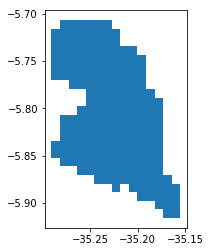

In [4]:
sgrid = geohunter.features.SquareGrid(1).fit(city_shape)
sgrid.data.plot()

In [29]:
pgrid = geohunter.features.Grid(0.5).fit(sgrid.data[['geometry','BAIRRO']])

In [34]:
Xk = geohunter.features.KDEFeatures(landmarks, kde_params='auto')\
                        .fit_transform(pgrid.data)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:791: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.ne

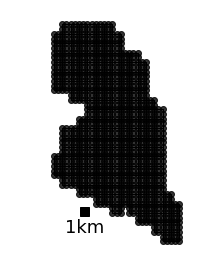

In [35]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

fig, ax = plt.subplots(figsize=(3,4))
sgrid.data.plot(ax=ax, color='white', edgecolor='black')
pgrid.data.plot(ax=ax, color='black', alpha=0.8)

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           1/110, '1km', 'lower left', 
                           pad=1,
                           color='black',
                           frameon=False,
                           size_vertical=1/110, fontproperties=fontprops)
ax.add_artist(scalebar)
ax.axis('off')
plt.tight_layout()
# fig.savefig('grids.pdf',dpi=100)

In [36]:
x = Xk.join(pgrid.data[['geometry','BAIRRO']])
x.crs = {'init':'epsg:4326'}
x = gpd.sjoin(x, sgrid.data[['geometry','BAIRRO']]).groupby('index_right').mean()
x.index.name = 'square_place'
Xk = gpd.GeoDataFrame(x.join(sgrid.data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [37]:
Xk.head()

,kde:amenity_hospital,kde:amenity_place_of_worship,kde:amenity_police,kde:leisure_*,kde:tourism_*,kde:shop_*,kde:highway_bus_stop,kde:highway_residential,kde:highway_primary,geometry,index_right,BAIRRO,REG_ADM,lon,lat
square_place,,,,,,,,,,,,,,,
7,-2.215459,-14.222142,-0.861577,1.204044,-19.189886,-12.720072,-4.991425,3.076318,-46.838811,POLYGON ((-35.29122514945666 -5.85218589623224...,19,Guarapes,Oeste,-35.28668,-5.847640
8,-2.539755,-14.522906,-0.791431,-1.020138,-20.081490,-11.794960,-6.152509,2.434452,-68.018441,POLYGON ((-35.29122514945666 -5.84309498714133...,19,Guarapes,Oeste,-35.28668,-5.838550
16,3.671518,-1.284774,-2.265299,1.919123,-13.538078,-0.381358,2.246175,4.121558,-17.551378,POLYGON ((-35.29122514945666 -5.77036771441406...,33,N. S. Apresentação,Norte,-35.28668,-5.765822
17,3.291435,-3.313779,-2.761924,2.262865,-13.598472,-1.816797,0.952536,4.272802,-26.156459,POLYGON ((-35.29122514945666 -5.76127680532315...,33,N. S. Apresentação,Norte,-35.28668,-5.756731
18,2.387067,-5.896353,-3.307689,1.479408,-14.308222,-4.414960,-2.094441,4.057135,-13.214755,POLYGON ((-35.29122514945666 -5.75218589623224...,33,N. S. Apresentação,Norte,-35.28668,-5.747640


# Baseline

In [38]:
Xb = pd.DataFrame(index=sgrid.data.index, 
        columns=list(landmarks.pdf['tag'].unique())+list(landmarks.ldf['tag'].unique()))
Xb.index.name = 'square_place'
Xb.head()

,amenity_hospital,amenity_place_of_worship,amenity_police,leisure_*,tourism_*,shop_*,highway_bus_stop,highway_residential,highway_primary
square_place,,,,,,,,,
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
for ptag in landmarks.pdf['tag'].unique():
    p = landmarks.pdf.loc[landmarks.pdf['tag']==ptag]
    vb = gpd.sjoin(p, sgrid.data[['geometry']]).groupby('index_right').size()
    Xb.loc[vb.index,ptag] = vb
for ltag in landmarks.ldf['tag'].unique():
    l = landmarks.ldf.loc[landmarks.ldf['tag']==ltag]
    vb = gpd.sjoin(l, sgrid.data[['geometry']]).groupby('index_right').size()
    Xb.loc[vb.index,ltag] = vb
Xb = Xb.fillna(0)
Xb = gpd.GeoDataFrame(Xb.join(sgrid.data))

In [41]:
Xb.head()

,amenity_hospital,amenity_place_of_worship,amenity_police,leisure_*,tourism_*,shop_*,highway_bus_stop,highway_residential,highway_primary,geometry,index_right,BAIRRO,REG_ADM,lon,lat
index_right,,,,,,,,,,,,,,,
7,0,0,0,0,0,0,0,104,0,POLYGON ((-35.29122514945666 -5.85218589623224...,19,Guarapes,Oeste,-35.286680,-5.847640
8,0,0,0,0,0,0,0,27,0,POLYGON ((-35.29122514945666 -5.84309498714133...,19,Guarapes,Oeste,-35.286680,-5.838550
29,0,0,0,0,0,0,0,35,0,POLYGON ((-35.28213424036575 -5.86127680532315...,19,Guarapes,Oeste,-35.277589,-5.856731
30,0,0,0,0,0,0,0,74,0,POLYGON ((-35.28213424036575 -5.85218589623224...,19,Guarapes,Oeste,-35.277589,-5.847640
31,0,0,0,0,0,0,0,194,0,POLYGON ((-35.28213424036575 -5.84309498714133...,19,Guarapes,Oeste,-35.277589,-5.838550


# Visualizations

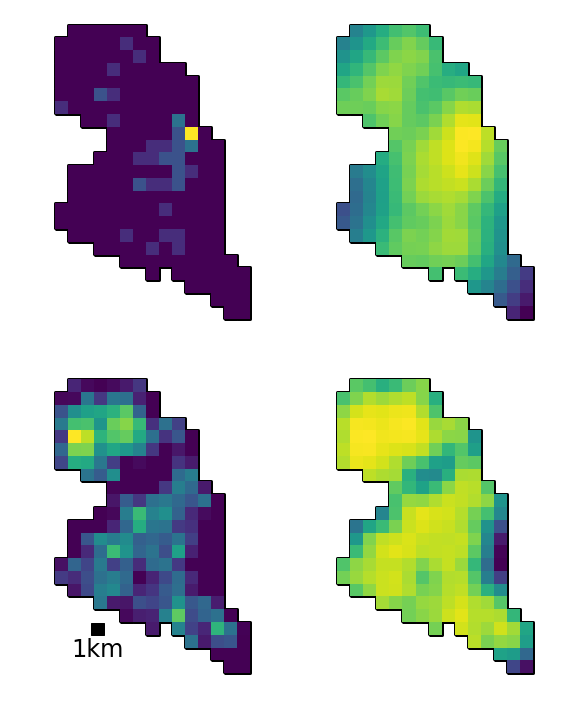

In [40]:
fig, ax = plt.subplots(figsize=(8,10),ncols=2, nrows=2)

for i in range(2):
    for j in range(2):
        sgrid.data.plot(edgecolor='black', color='white', ax=ax[i][j], linewidth=3)   

Xb.plot(column='amenity_hospital',ax=ax[0][0])
Xk.plot(column='kde:amenity_hospital',ax=ax[0][1])

Xb.plot(column='highway_residential',ax=ax[1][0])
Xk.plot(column='kde:highway_residential',ax=ax[1][1])

for i in range(2):
    for j in range(2):
        ax[i][j].axis('off')       
        
fontprops = fm.FontProperties(size=24)
scalebar = AnchoredSizeBar(ax[1][0].transData,
                           1/110, '1km', 'lower left', 
                           pad=1,
                           color='black',
                           frameon=False,
                           size_vertical=1/110, fontproperties=fontprops)
ax[1][0].add_artist(scalebar)
plt.tight_layout()
plt.savefig('qualitative.pdf',dpi=200)

# Evaluation with metrics